In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad_vec

## Dane dla zadania 1 i zadania 2
Niepotrzebne (jedno z trzech) zakomentować

In [10]:
def f(x):
    return 4.0 / (1 + x**2)
exact_value = np.pi

In [11]:

# def f(x):
#     return np.where(x > 0, np.sqrt(x) * np.log(x), 0)
# exact_value = -4/9

In [12]:
# a = 0.001
# b = 0.004

# def f(x):
#     term1 = 1 / ((x - 0.3)**2 + a)
#     term2 = 1 / ((x - 0.9)**2 + b)
#     return term1 + term2 - 6

# def exact_integral(x0, a):
#     return 1 / np.sqrt(a) * (np.arctan((1 - x0) / np.sqrt(a)) + np.arctan(x0 / np.sqrt(a)))

# exact_value_1 = exact_integral(0.3, a)
# exact_value_2 = exact_integral(0.9, b)

# exact_value = exact_value_1 + exact_value_2 - 6

## Porównanie Gauss-Kronrod i Trapezów

In [13]:
errors_trapezoidal = []
errors_gauss_kronrod = []
evaluations_trapezoidal = []
evaluations_gauss_kronrod = []
result_trapezoidal = []
result_gauss_kronrod = []


tolerances = np.logspace(0, -14, 25)
for tolerance in tolerances:
    trapez_result, trapez_error, trapez_info = quad_vec(f, 0, 1, epsabs=tolerance, full_output=True, quadrature='trapezoid')
    errors_trapezoidal.append(abs(abs(trapez_result - exact_value) / exact_value))
    evaluations_trapezoidal.append(trapez_info.neval)
    result_trapezoidal.append(trapez_result)

    gk_result, gk_error, gk_info = quad_vec(f, 0, 1, epsabs=tolerance, full_output=True, quadrature='gk15')
    errors_gauss_kronrod.append(abs(abs(gk_result - exact_value) / exact_value))
    evaluations_gauss_kronrod.append(gk_info.neval)
    result_gauss_kronrod.append(gk_result)

print("Errors gauss-kronrod", errors_gauss_kronrod)
print("Errors trapezoidal", errors_trapezoidal)
print("Evaluations gauss-kronrod", evaluations_gauss_kronrod)
print("Evaluations trapezoidal", evaluations_trapezoidal)
print("Result gauss-kronrod", result_gauss_kronrod)
print("Result trapezoidal", result_trapezoidal)

Errors gauss-kronrod [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Errors trapezoidal [0.003315574025695356, 0.003315574025695356, 0.00010840412554188029, 3.165944627416299e-05, 4.87268103480351e-06, 1.3441245128739876e-05, 4.060818858507106e-06, 9.89453049269224e-07, 3.131580465138845e-07, 8.255660163987829e-08, 2.281658387205292e-08, 6.217860007233634e-09, 1.6953074550768626e-09, 6.43550748445597e-10, 6.43550748445597e-10, 6.43550748445597e-10, 6.43550748445597e-10, 6.43550748445597e-10, 6.43550748445597e-10, 6.43550748445597e-10, 6.43550748445597e-10, 6.43550748445597e-10, 6.43550748445597e-10, 6.43550748445597e-10, 6.43550748445597e-10]
Evaluations gauss-kronrod [45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45]
Evaluations trapezoidal [8, 8, 13, 28, 48, 98, 193, 378, 738, 1448, 2858, 5613, 11008, 19648, 19648, 19648, 19648, 19648, 19648, 19648, 19648, 1

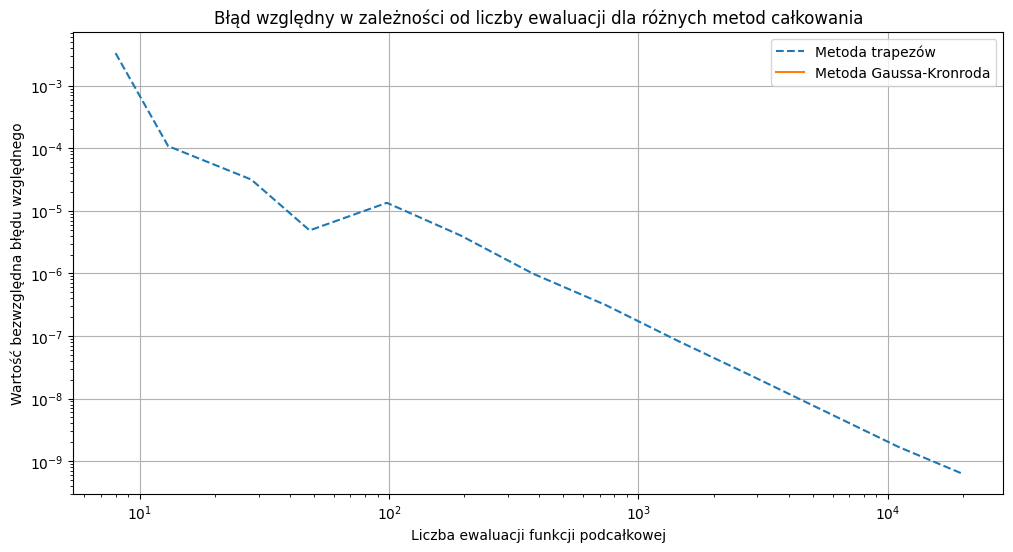

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(evaluations_trapezoidal, errors_trapezoidal, '--', label='Metoda trapezów')
plt.plot(evaluations_gauss_kronrod, errors_gauss_kronrod, label='Metoda Gaussa-Kronroda')
plt.xlabel('Liczba ewaluacji funkcji podcałkowej')
plt.ylabel('Wartość bezwzględna błędu względnego')
plt.xscale('log')
plt.yscale('log')
plt.title('Błąd względny w zależności od liczby ewaluacji dla różnych metod całkowania')
plt.legend()
plt.grid(True)
plt.show()

## Zadanie 1 - Porównanie do Lab6

In [15]:
from scipy import integrate

pi_true = np.pi
M_values = range(1, 26)
errors_midpoint = []
errors_trapez = []
errors_simpson = []
error_gauss_legendre = []

for m in M_values:
    n = 2**m
    x = np.linspace(0, 1, n+1)
    y = f(x)
    
    x_mid = (x[:-1] + x[1:]) / 2  
    midpoint_approx = (x[1] - x[0]) * np.sum(f(x_mid))
    errors_midpoint.append(abs(abs(midpoint_approx - exact_value)/exact_value))

    trapezoidal_approx = integrate.trapezoid(y=y, x=x)
    errors_trapez.append(abs(abs(trapezoidal_approx - exact_value)/exact_value))
    
    simpson_approx = integrate.simpson(y=y, x=x)
    errors_simpson.append(abs(abs(simpson_approx - exact_value)/exact_value))


[0.0026290232907892, 7.647757510904547e-06, 4.8106519024246646e-08, 7.527937548427748e-10, 1.1763811581839728e-11, 1.8376538159566985e-13, 2.8271597168564595e-15, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.4135798584282297e-16, 0.0, 0.0, 0.0, 1.4135798584282297e-16, 2.8271597168564594e-16, 1.4135798584282297e-16, 4.240739575284689e-16, 1.5549378442710527e-15, 2.1203697876423446e-15]


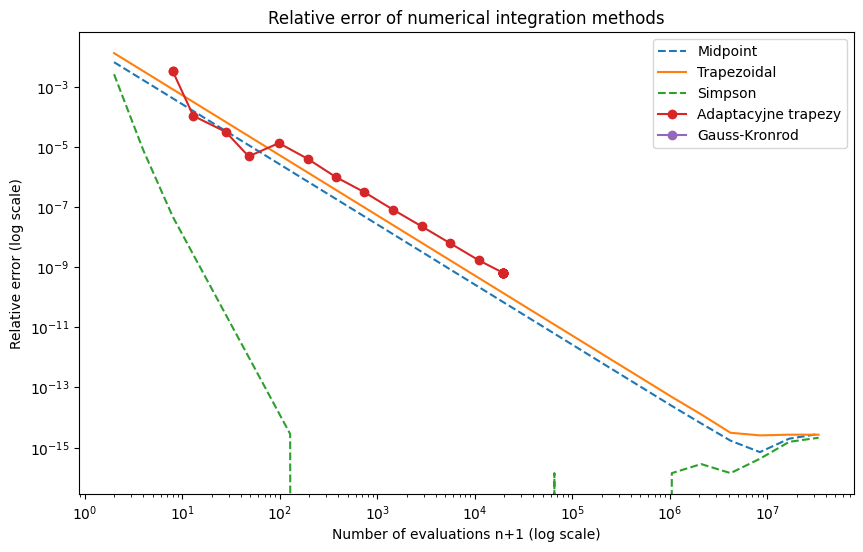

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(2**np.array(M_values), errors_midpoint, '--', label='Midpoint')
plt.plot(2**np.array(M_values), errors_trapez, '-', label='Trapezoidal')
plt.plot(2**np.array(M_values), errors_simpson , '--', label='Simpson')


plt.plot(evaluations_trapezoidal, errors_trapezoidal, 'o-', label='Adaptacyjne trapezy')
plt.plot(evaluations_gauss_kronrod, errors_gauss_kronrod, 'o-', label='Gauss-Kronrod')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of evaluations n+1 (log scale)')
plt.ylabel('Relative error (log scale)')
plt.title('Relative error of numerical integration methods')
plt.legend()

plt.show()